<h2><center>Метрики: LogLoss</center></h2>

In [3]:
%matplotlib inline

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)

from ipywidgets import interact, IntSlider, FloatSlider



## Метрики классификации

* Как правило, классификаторы выдают не просто предсказанную метку класса, но и степень уверенности в ней
* Основные меры качества
    * Accuracy
    * Precision, Recall, F-мера
    * ROC-AUC
    * **Log-loss**

## Precision / Recall
* Вычисляются на бинарных предсказания
<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/800px-Precisionrecall.svg.png" width=40%> </center>

## ROC кривая

* Выбор порога классификации - отдельная большая задача
* Можно ли как-то обойтись без него и сравнить неколько моделей?
* ROC кривая - показывает зависимость между TPR (верным предсказанием) и FPR (ложным срабатыванием)


# LogLoss

Метрика бинарной классификации, требует от классификатора вероятностей.
* Классификатор $a(x)$ возвращает степень принадлежности к классу "+1" - prob(x).
* prob(x) удовлетворяет ограничениям вероятности: 0 <= prob(x) <= 1

Будем учитывать степень увернности классификатора и сильнее штрафовать за уверенный неправильный ответ

In [5]:
def log_loss(y_true, y_pred, eps = 1e-5):
    y_clipped = np.clip(y_pred, eps, 1-eps)
    return - (y_true * np.log(y_clipped) + (1-y_true)*np.log(1 - y_clipped))

In [6]:
y_preds = np.linspace(0, 1, 100)
y_true = np.ones_like(y_preds)

loss = log_loss(y_true, y_preds)

Text(0.5, 1.0, 'log loss')

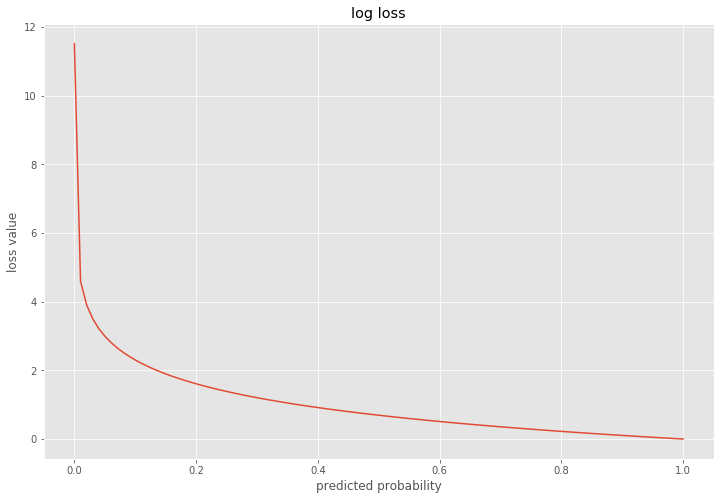

In [7]:
plt.plot(y_preds, loss)
plt.xlabel("predicted probability")
plt.ylabel("loss value")
plt.title("log loss")

# Свойства
* Для задач бинарной классификации
* Оперирует веротяностями принадлежности к классу
* Зависит от абсолютных значений (в отличие от ROC-AUC)
* Сильно штрафует уверенные неправильные предсказания

## Примеры

In [15]:
# python: а что произойдет тут с нашей функцией log_loss?
from sklearn.metrics import log_loss

y_true = np.random.uniform(low=0.0, high=1.0, size=10000) > 0.5
y_random = np.random.uniform(low=0.0, high=1.0, size=10000)

In [16]:
y_true

array([False, False,  True, ..., False,  True,  True])

In [17]:
y_random

array([0.03291691, 0.17862927, 0.09826784, ..., 0.70998274, 0.43670794,
       0.14742271])

In [18]:
log_loss(y_true, y_random)

1.0069731304213787

In [19]:
for alpha in np.linspace(0, 1, 20):
    y_mix = y_true * alpha + y_random * (1-alpha)
    ll = log_loss(y_true, y_mix)
    print("alpha: {:.2f}, logloss: {:.4f}".format(alpha, ll))

alpha: 0.00, logloss: 1.0070
alpha: 0.05, logloss: 0.8407
alpha: 0.11, logloss: 0.7383
alpha: 0.16, logloss: 0.6563
alpha: 0.21, logloss: 0.5864
alpha: 0.26, logloss: 0.5248
alpha: 0.32, logloss: 0.4693
alpha: 0.37, logloss: 0.4186
alpha: 0.42, logloss: 0.3718
alpha: 0.47, logloss: 0.3282
alpha: 0.53, logloss: 0.2874
alpha: 0.58, logloss: 0.2490
alpha: 0.63, logloss: 0.2126
alpha: 0.68, logloss: 0.1781
alpha: 0.74, logloss: 0.1452
alpha: 0.79, logloss: 0.1137
alpha: 0.84, logloss: 0.0836
alpha: 0.89, logloss: 0.0547
alpha: 0.95, logloss: 0.0268
alpha: 1.00, logloss: 0.0000


In [13]:
# Лик: определение баланса классов

In [14]:
# Лик: определение меток через точность